## Prediction of the Following Month Forward Price Using LSTM Models

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)

# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'Pipeline')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
from build_a_pipeline import build_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [2]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [3]:
from build_a_pipeline import build_pipeline_P0_foward_price
model_performance = []
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1')
datetime_index = x_val.index
#x_val = x_val.sort_index(ascending=True)
#y_val = y_val.sort_index(ascending=True)
# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    
model_performance = [] 

LSTM Input Layer
- Added TimeDistributed Layer with selu activation function

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dense, Relu',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 31928.7363 - root_mean_squared_error: 178.1961 - val_loss: 1949.0875 - val_root_mean_squared_error: 44.1485
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 12697.7715 - root_mean_squared_error: 112.5139 - val_loss: 79.5254 - val_root_mean_squared_error: 8.9177
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4247.0317 - root_mean_squared_error: 65.0992 - val_loss: 177.0940 - val_root_mean_squared_error: 13.3077
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 1312.4950 - root_mean_squared_error: 36.1202 - val_loss: 59.1672 - val_root_mean_squared_error: 7.6920
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 756.0075 - root_mean_squared_error: 27.3853 - val_loss: 72.9851 - val_root_mean_squared_error: 8.5431
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 572.4619 - root_mean_squared_error: 23.7132 - val_loss: 70.8074 - val_root_mean_squared_error: 8.4147
Epoch 7/120
1

LSTM Input Layer
- Added TimeDistributed Layer with relu activation function

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='relu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dense, Selu',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - loss: 33554.9844 - root_mean_squared_error: 182.5464 - val_loss: 4104.5601 - val_root_mean_squared_error: 64.0668
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 18264.4590 - root_mean_squared_error: 134.9344 - val_loss: 2687.8376 - val_root_mean_squared_error: 51.8444
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 8434.4541 - root_mean_squared_error: 91.6961 - val_loss: 207.1643 - val_root_mean_squared_error: 14.3932
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3179.6262 - root_mean_squared_error: 56.3181 - val_loss: 221.5826 - val_root_mean_squared_error: 14.8856
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 988.6572 - root_mean_squared_error: 31.3652 - val_loss: 42.8218 - val_root_mean_squared_error: 6.5438
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 702.0876 - root_mean_squared_error: 26.4043 - val_loss: 48.2358 - val_root_mean_squared_error: 6.9452
Epoch 7/

LSTM
- Multivariate Layer
- Selu function
- Added Dropout

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(150, activation='relu')), 
    Dropout(0.2),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.2),
    TimeDistributed(Dense(50, activation='relu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dense, Relu Dropout',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - loss: 26748.2090 - root_mean_squared_error: 163.0684 - val_loss: 77.0828 - val_root_mean_squared_error: 8.7797
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4883.5356 - root_mean_squared_error: 68.9981 - val_loss: 165.5412 - val_root_mean_squared_error: 12.8663
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 2105.4329 - root_mean_squared_error: 45.7205 - val_loss: 166.7667 - val_root_mean_squared_error: 12.9138
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1369.7479 - root_mean_squared_error: 36.9059 - val_loss: 143.5669 - val_root_mean_squared_error: 11.9819
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 1295.5995 - root_mean_squared_error: 35.9522 - val_loss: 100.2319 - val_root_mean_squared_error: 10.0116
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1084.2310 - root_mean_squared_error: 32.7881 - val_loss: 114.3240 - val_root_mean_squared_error: 10.6922
Epoch 7/

More layers or neurons does not seem to improve the performance

## Back to the Best Performing One

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'Best So Far',
    'LayerExtra': 'TimeDistributed, Dense, Relu',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step - loss: 31699.1309 - root_mean_squared_error: 177.5739 - val_loss: 1869.0785 - val_root_mean_squared_error: 43.2328
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 11108.8330 - root_mean_squared_error: 105.2581 - val_loss: 267.3864 - val_root_mean_squared_error: 16.3520
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3387.3560 - root_mean_squared_error: 58.1072 - val_loss: 124.4487 - val_root_mean_squared_error: 11.1557
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 1204.8442 - root_mean_squared_error: 34.6045 - val_loss: 66.9974 - val_root_mean_squared_error: 8.1852
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 732.2175 - root_mean_squared_error: 26.9912 - val_loss: 100.8302 - val_root_mean_squared_error: 10.0414
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 610.7518 - root_mean_squared_error: 24.5750 - val_loss: 93.6373 - val_root_mean_squared_error: 9.6766
Epoch 7/1

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(195, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(95, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dropout',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 315ms/step - loss: 31607.0312 - root_mean_squared_error: 177.3210 - val_loss: 2407.5481 - val_root_mean_squared_error: 49.0668
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 11566.0859 - root_mean_squared_error: 107.3938 - val_loss: 65.1853 - val_root_mean_squared_error: 8.0737
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3444.8984 - root_mean_squared_error: 58.5992 - val_loss: 150.8345 - val_root_mean_squared_error: 12.2815
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1212.1312 - root_mean_squared_error: 34.6892 - val_loss: 54.5916 - val_root_mean_squared_error: 7.3886
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 686.4229 - root_mean_squared_error: 26.1141 - val_loss: 58.4728 - val_root_mean_squared_error: 7.6468
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 587.0170 - root_mean_squared_error: 24.0800 - val_loss: 61.1635 - val_root_mean_squared_error: 7.8207
Epoch 7/120
1

That one is pretty good, but I will try something here

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.1),
    TimeDistributed(Dense(111, activation='selu')), 
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.1),
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(111, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dropout',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 98s 411ms/step - loss: 33461.6602 - root_mean_squared_error: 182.3011 - val_loss: 101.9154 - val_root_mean_squared_error: 10.0953
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 20264.7715 - root_mean_squared_error: 141.6920 - val_loss: 7348.0986 - val_root_mean_squared_error: 85.7211
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 19513.6445 - root_mean_squared_error: 139.1620 - val_loss: 3181.8879 - val_root_mean_squared_error: 56.4082
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 18942.0703 - root_mean_squared_error: 136.8037 - val_loss: 3889.4978 - val_root_mean_squared_error: 62.3658
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 18936.4062 - root_mean_squared_error: 136.8459 - val_loss: 3991.1963 - val_root_mean_squared_error: 63.1759
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18965.2871 - root_mean_squared_error: 136.9494 - val_loss: 3836.9917 - val_root_mean_squared_error:

Conclusion, adding more layers does not seem to add better performance

In [10]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_val)

BadZipFile: Bad CRC-32 for file 'config.json'

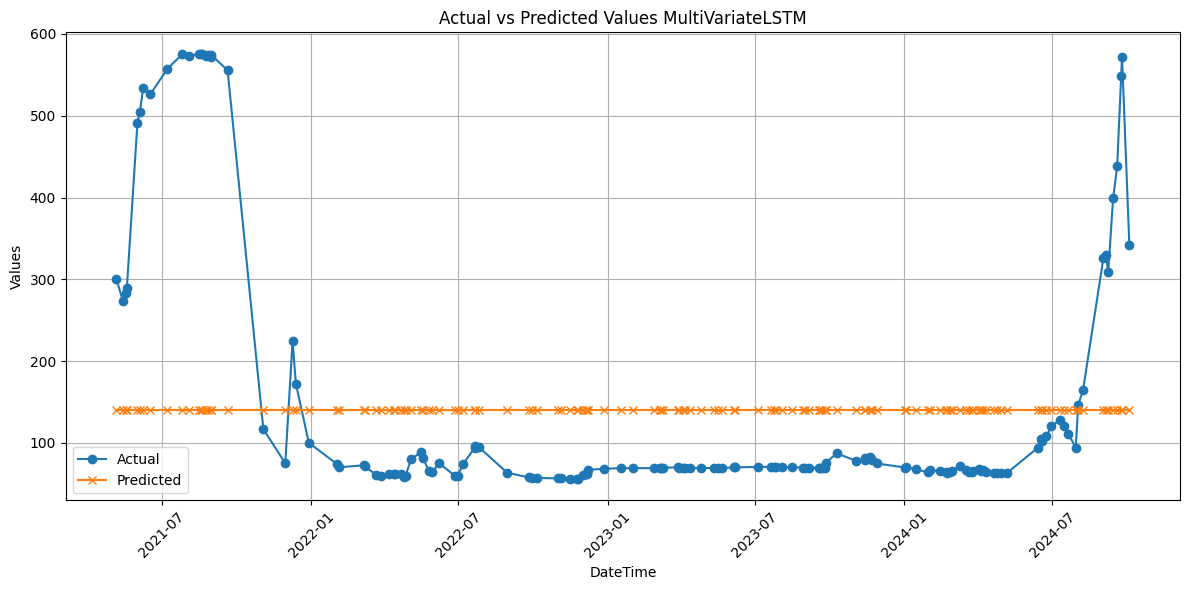

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
predictions_df = predictions_df.sort_index()
y_val = y_val.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val, label='Actual', marker='o')
plt.plot(y_val.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
performance_df = pd.DataFrame(model_performance)
performance_df_sorted = performance_df.sort_values(by='Validation RMSE', ascending=True)
performance_df_sorted

,Model,LayerExtra,Train RMSE,Validation RMSE
3,Best So Far,"TimeDistributed, Dense, Relu",10.964216,19.340809
4,LSTM - 200 input,"TimeDistributed, Dropout",9.978686,19.573156
0,LSTM - 200 input,"TimeDistributed, Dense, Relu",11.360278,20.255789
1,LSTM - 200 input,"TimeDistributed, Dense, Selu",9.552195,20.457691
2,LSTM - 200 input,"TimeDistributed, Dense, Relu Dropout",46.823586,73.447952
5,LSTM - 200 input,"TimeDistributed, Dropout",122.726692,167.833221
